In [1]:
from dataclasses import dataclass, asdict
from functools import partial

In [2]:
from ipynb.fs.full.quantumsystem import *

In [3]:
from ipynb.fs.full.MovementSystem import *

In [4]:
from ipynb.fs.full.DamageSystem import *

In [5]:
from ipynb.fs.full.WeaponsSystem import *

In [6]:
qs.quantum_system_name = "MechaCombatSystem"

In [7]:
class SizeSystem(QuantumSystem.System):
    pass

class TMMSystem(QuantumSystem.System):
    pass

In [8]:
class SpecialSystem(QuantumSystem.System):
    edge_name = "special"

In [10]:
class Structure(QuantumSystem.HyperSystem):
    systems = [XYLocation, ArmorSystem]
    
    @classmethod
    def height(cls, structureId):
        return 5

In [11]:
class MechTypeSystem(QuantumSystem.System):
    edge_name = "mech_type"

class MechModelSystem(QuantumSystem.System):
    edge_name = "mech_model"

class MechRoleSystem(QuantumSystem.System):
    edge_name = "mech_role"
    
class PointValueSystem(QuantumSystem.System):
    edge_name = "point_value"
    
class MechDefinitionSystem(QuantumSystem.HyperSystem):
    systems = [MechTypeSystem, MechModelSystem, MechRoleSystem, SizeSystem, TMMSystem, SpecialSystem, PointValueSystem]

In [12]:
class UnitSystem(QuantumSystem.HyperSystem):
    systems = [MoveSystem, Weapons, UnitDamageSystem]

class MechSystem(QuantumSystem.HyperSystem):
    systems = [UnitSystem, MechDefinitionSystem]
    
    @classmethod
    def buildMechFactory(cls, systemDefaults):
        return partial(
            cls.build_system,
            terminants=systemDefaults)
    
@dataclass
class Mech(QuantumSystem.Entity):
    """ TODO """


In [13]:
MechFactories = {
    "Kingfisher Prime": MechSystem.buildMechFactory([
        [   # Unit System
            [  # Move System
                json.dumps([0, 0]), "0", "8j"
            ],
            [  # Weapons System
                [["0", "6"]], [["2", "6"]], [["4", "3"]], "1", "3"
            ],
            [  # Unit Damage System
                ["9", "7"], ["1", "4", "4", "4"]
            ]
        ],
        [  # Mech Definition System
            "BM", "Kingfisher Prime", "Brawler", "4", "1", json.dumps(["OMNI", "CASE", "IF01"]), "54"
        ]
    ]),
    "Atlas": MechSystem.buildMechFactory([
        [   # Unit System
            [  # Move System
                json.dumps([0, 0]), "0", "6"
            ],
            [  # Weapons System
                [["0", "4"]], [["2", "4"]], [["4", "4"]], "1", "3"
            ],
            [  # Unit Damage System
                ["10", "8"], ["1", "4", "4", "4"]
            ]
        ],
        [  # Mech Definition System
            "BM", "Atlas", "Juggernaut", "4", "1", json.dumps(["AC2", "IF1", "LRM1", "REAR2"]), "52"
        ]
    ]),
    "Huntsman": MechSystem.buildMechFactory([
        [   # Unit System
            [  # Move System
                json.dumps([0, 0]), "0", "10j"
            ],
            [  # Weapons System
                [["0", "3"]], [["2", "3"]], [["4", "2"]], "3", "3"
            ],
            [  # Unit Damage System
                ["6", "3"], ["1", "4", "4", "4"]
            ]
        ],
        [  # Mech Definition System
            "BM", "Huntsman", "Sniper", "2", "2", json.dumps(["OMNI", "CASE", "IF1", "FLK0"]), "37"
        ]
    ])
}

In [ ]:
ObjectFactories = MechFactories

In [15]:
if __name__ == "__main__":
    qs.reset()
    MechFactories['Kingfisher Prime']("Gypsy Danger")

In [16]:
if __name__ == "__main__":
    MoveSystem.move("Gypsy Danger", [1, 1, 1])

Received: Cannot move unit further (15.066519173319364) than its movement speed (8)
Received: Movement relationship not found on Apartment


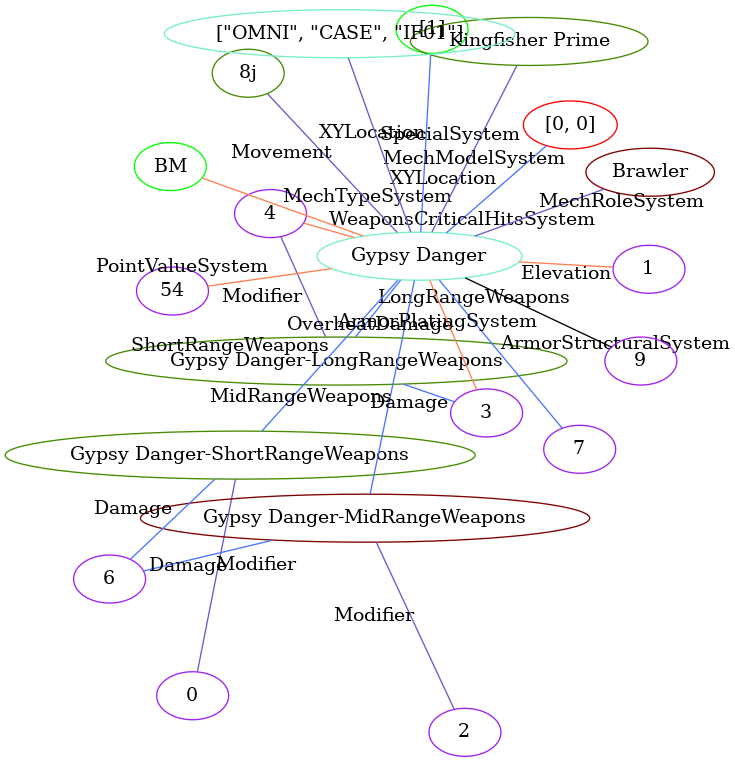

In [17]:
if __name__ == "__main__":
    from IPython.display import display
    try:
        MoveSystem.move("Gypsy Danger", [15, 1, 1])
    except AssertionError as ae:
        print(f"Received: {ae}")

    try:
        MoveSystem.move("Apartment", [1, 0, 0])
    except Exception as e:
        print(f"Received: {e}")

    display(qs.render())